In [1]:
import tensorflow as tf
# %matplotlib inline 
import matplotlib.pyplot as plt


# Get the mnist dataset
mnist = tf.keras.datasets.mnist

# Unpack training and test datasets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data to between 0-1 rather than 0-255
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

# Sequential model (add layer by layer), less complex than a functional model
model = tf.keras.models.Sequential()

# Use keras to flatten our input layer to a single dimension array
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
# 128 neurons, relu (rectified linear) as activation function
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
# Output Layer - 10 neurons, using Softmax for probability distribution
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))

# Training params for the model: using 'adam' optimizer, loss for degree of error, return accuracy metrics
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Train the model, Define 'epochs', how many times we run the training
model.fit(x_train, y_train, epochs=3)



Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Epoch 1/3
60000/60000 [==============================] - 5s 89us/sample - loss: 0.2698 - acc: 0.9219
Epoch 2/3
60000/60000 [==============================] - 4s 65us/sample - loss: 0.1094 - acc: 0.9664
Epoch 3/3
60000/60000 [==============================] - 4s 64us/sample - loss: 0.0746 - acc: 0.9766


In [2]:
# Calculate the loss and accuracy validations
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

10000/10000 [==============================] - 0s 40us/sample - loss: 0.0896 - acc: 0.9715
0.08961504669580608 0.9715


In [3]:
# Save the model
model.save('numberPredictor.h5')

In [4]:
# Load the saved Model
working_model = tf.keras.models.load_model('numberPredictor.h5')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [5]:
# Predictions is the loaded model predicting what number it has been given from the test set
predictions = working_model.predict([x_test])
print(predictions)

[[2.92043438e-08 2.49518365e-07 1.16431329e-05 ... 9.99962926e-01
  1.16623312e-06 2.42600436e-06]
 [7.17656186e-12 1.74053552e-04 9.99825895e-01 ... 8.47161175e-10
  6.51109167e-09 2.43348775e-15]
 [6.87215334e-08 9.99714792e-01 1.44197647e-05 ... 6.85863051e-05
  1.80785646e-04 2.77178202e-07]
 ...
 [2.60021604e-08 2.57226202e-06 5.54895564e-07 ... 2.74188002e-04
  4.10847424e-05 6.08113369e-05]
 [1.57937939e-05 4.79615519e-05 1.21342955e-05 ... 7.91380735e-05
  6.57696873e-02 7.53774066e-06]
 [2.53090525e-06 4.25536939e-08 1.16501542e-06 ... 1.21624744e-09
  8.71782674e-07 2.33816211e-09]]


In [6]:
# Using numpy to display the predicted number in the list
import numpy as np
print(np.argmax(predictions[2]))

1


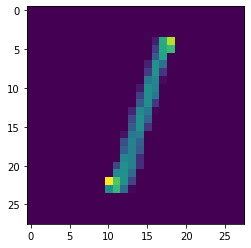

In [7]:
# Using matplotlib to display the predicted number for comparison
plt.imshow(x_test[2])
plt.show()